In [40]:
%cd "/content/drive/MyDrive/Desktop/PythonP/week3"

/content/drive/MyDrive/Desktop/PythonP/week3


1. **IMPORT ALL THE NECESSARY PACKAGES** . THIS TIME INSTEAD OF USING SESSION IN OLDER VERSION OF TENSORFLOW WE WILL USE EAGER TENSOR

In [6]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
import time

In [7]:
#checking the version of tensorflow
tf.__version__

'2.15.0'

In [8]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
test_dataset = h5py.File('datasets/test_signs.h5', "r")

In [9]:
train_dataset['train_set_x']

<HDF5 dataset "train_set_x": shape (1080, 64, 64, 3), type "|u1">

In case the data set is not a tensor data set the functions will give error . make sure it is a tensor data set or convert into one






In [10]:
# tf.data.Dataset.from_tensor_slices( list_or_numpy_array ) creates TensorFlow Datasets
x_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_x'])
y_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_y'])

x_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_x'])
y_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_y'])

In [11]:
type(x_train)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [12]:
print(x_train.element_spec)

TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None)


In [13]:
print(next(iter(x_train)))

tf.Tensor(
[[[227 220 214]
  [227 221 215]
  [227 222 215]
  ...
  [232 230 224]
  [231 229 222]
  [230 229 221]]

 [[227 221 214]
  [227 221 215]
  [228 221 215]
  ...
  [232 230 224]
  [231 229 222]
  [231 229 221]]

 [[227 221 214]
  [227 221 214]
  [227 221 215]
  ...
  [232 230 224]
  [231 229 223]
  [230 229 221]]

 ...

 [[119  81  51]
  [124  85  55]
  [127  87  58]
  ...
  [210 211 211]
  [211 212 210]
  [210 211 210]]

 [[119  79  51]
  [124  84  55]
  [126  85  56]
  ...
  [210 211 210]
  [210 211 210]
  [209 210 209]]

 [[119  81  51]
  [123  83  55]
  [122  82  54]
  ...
  [209 210 210]
  [209 210 209]
  [208 209 209]]], shape=(64, 64, 3), dtype=uint8)


In [14]:
for element in x_train:
  print(element)
  break

tf.Tensor(
[[[227 220 214]
  [227 221 215]
  [227 222 215]
  ...
  [232 230 224]
  [231 229 222]
  [230 229 221]]

 [[227 221 214]
  [227 221 215]
  [228 221 215]
  ...
  [232 230 224]
  [231 229 222]
  [231 229 221]]

 [[227 221 214]
  [227 221 214]
  [227 221 215]
  ...
  [232 230 224]
  [231 229 223]
  [230 229 221]]

 ...

 [[119  81  51]
  [124  85  55]
  [127  87  58]
  ...
  [210 211 211]
  [211 212 210]
  [210 211 210]]

 [[119  79  51]
  [124  84  55]
  [126  85  56]
  ...
  [210 211 210]
  [210 211 210]
  [209 210 209]]

 [[119  81  51]
  [123  83  55]
  [122  82  54]
  ...
  [209 210 210]
  [209 210 209]
  [208 209 209]]], shape=(64, 64, 3), dtype=uint8)


There's one more additional difference between TensorFlow datasets and Numpy arrays: If you need to transform one, you would invoke the map method to apply the function passed as an argument to each of the elements.

In [15]:
def normalize(image):
    """
    Transform an image into a tensor of shape (64 * 64 * 3, 1)
    and normalize its components.

    Arguments
    image - Tensor.

    Returns:
    result -- Transformed tensor
    """
    image = tf.cast(image, tf.float32) / 256.0
    image = tf.reshape(image, [-1,1])
    return image

In [16]:
new_train = x_train.map(normalize)
new_test = x_test.map(normalize)

In [17]:
new_train.element_spec

TensorSpec(shape=(12288, 1), dtype=tf.float32, name=None)

In [18]:
print(next(iter(new_train)))

tf.Tensor(
[[0.88671875]
 [0.859375  ]
 [0.8359375 ]
 ...
 [0.8125    ]
 [0.81640625]
 [0.81640625]], shape=(12288, 1), dtype=float32)


2.1 - Linear Function
Let's begin this programming exercise by computing the following equation: Y = WX+b , where W  and X are random matrices and b is a random vector.

Exercise 1 - linear_function
Compute WX+b where W , X  and b
 are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, this is how to define a constant X with the shape (3,1):

X = tf.constant(np.random.randn(3,1), name = "X")
Note that the difference between tf.constant and tf.Variable is that you can modify the state of a tf.Variable but cannot change the state of a tf.constant.

You might find the following functions helpful:

tf.matmul(..., ...) to do a matrix multiplication
tf.add(..., ...) to do an addition
np.random.randn(...) to initialize randomly

In [19]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function:
            Initializes X to be a random tensor of shape (3,1)
            Initializes W to be a random tensor of shape (4,3)
            Initializes b to be a random tensor of shape (4,1)
    Returns:
    result -- Y = WX + b
    """

    np.random.seed(1)

    """
    Note, to ensure that the "random" numbers generated match the expected results,
    please create the variables in the order given in the starting code below.
    (Do not re-arrange the order).
    """
    # (approx. 4 lines)
    # X = ...
    # W = ...
    # b = ...
    # Y = ...
    # YOUR CODE STARTS HERE
    X = tf.constant(np.random.randn(3,1))
    W = tf.constant(np.random.randn(4,3))
    b = tf.constant(np.random.randn(4,1))
    Y = tf.add(tf.matmul(W,X),b)

    # YOUR CODE ENDS HERE
    return Y

In [20]:
result = linear_function()
print(result)

assert type(result) == EagerTensor, "Use the TensorFlow API"
assert np.allclose(result, [[-2.15657382], [ 2.95891446], [-1.08926781], [-0.84538042]]), "Error"
print("\033[92mAll test passed")

tf.Tensor(
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]], shape=(4, 1), dtype=float64)
All test passed


2.2 - Computing the Sigmoid
Amazing! You just implemented a linear function. TensorFlow offers a variety of commonly used neural network functions like tf.sigmoid and tf.softmax.

For this exercise, compute the sigmoid of z.

In this exercise, you will: Cast your tensor to type float32 using tf.cast, then compute the sigmoid using tf.keras.activations.sigmoid.


Exercise 2 - sigmoid
Implement the sigmoid function below. You should use the following:

tf.cast("...", tf.float32)
tf.keras.activations.sigmoid("...")

In [23]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):

    """
    Computes the sigmoid of z

    Arguments:
    z -- input value, scalar or vector

    Returns:
    a -- (tf.float32) the sigmoid of z
    """
    # tf.keras.activations.sigmoid requires float16, float32, float64, complex64, or complex128.

    # (approx. 2 lines)
    # z = ...
    # result = ...
    # YOUR CODE STARTS HERE
    z = tf.cast(z,tf.float32)
    a = tf.keras.activations.sigmoid(z)
    # YOUR CODE ENDS HERE
    return a

In [25]:
result = sigmoid(-1)
print ("type: " + str(type(result)))
print ("dtype: " + str(result.dtype))
print ("sigmoid(-1) = " + str(result))
print ("sigmoid(0) = " + str(sigmoid(0.0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

def sigmoid_test(target):
    result = target(0)
    assert(type(result) == EagerTensor)
    assert (result.dtype == tf.float32)
    assert sigmoid(0) == 0.5, "Error"
    assert sigmoid(-1) == 0.26894143, "Error"


    print("\033[92mAll test passed")

sigmoid_test(sigmoid)

type: <class 'tensorflow.python.framework.ops.EagerTensor'>
dtype: <dtype: 'float32'>
sigmoid(-1) = tf.Tensor(0.26894143, shape=(), dtype=float32)
sigmoid(0) = tf.Tensor(0.5, shape=(), dtype=float32)
sigmoid(12) = tf.Tensor(0.99999386, shape=(), dtype=float32)
All test passed


This is called "one hot" encoding, because in the converted representation, exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, you might have to write a few lines of code. In TensorFlow, you can use one line of code:

tf.one_hot(labels, depth, axis=0)
axis=0 indicates the new axis is created at dimension 0
Exercise 3 - one_hot_matrix
Implement the function below to take one label and the total number of classes
, and return the one hot encoding in a column whise matrix. Use tf.one_hot() to do this, and tf.reshape() to reshape your one hot tensor!

tf.reshape(tensor, shape)

In [26]:
# GRADED FUNCTION: one_hot_matrix
def one_hot_matrix(label, depth=6):
    """
    Computes the one hot encoding for a single label

    Arguments:
        label --  (int) Categorical labels
        depth --  (int) Number of different classes that label can take

    Returns:
         one_hot -- tf.Tensor A single-column matrix with the one hot encoding.
    """
    # (approx. 1 line)
    # one_hot = ...
    # YOUR CODE STARTS HERE
    one_hot = tf.one_hot(label,depth,axis=0)
    one_hot = tf.reshape(one_hot,[depth,1])

    # YOUR CODE ENDS HERE
    return one_hot

In [27]:
def one_hot_matrix_test(target):
    label = tf.constant(1)
    depth = 4
    result = target(label, depth)
    print(result)
    assert result.shape[0] == depth, "Use the parameter depth"
    assert result.shape[1] == 1, f"Reshape to have only 1 column"
    assert np.allclose(result,  [[0.], [1.], [0.], [0.]] ), "Wrong output. Use tf.one_hot"
    result = target(3, depth)
    assert np.allclose(result, [[0.], [0.], [0.], [1.]] ), "Wrong output. Use tf.one_hot"

    print("\033[92mAll test passed")

one_hot_matrix_test(one_hot_matrix)

tf.Tensor(
[[0.]
 [1.]
 [0.]
 [0.]], shape=(4, 1), dtype=float32)
All test passed


In [28]:
new_y_test = y_test.map(one_hot_matrix)
new_y_train = y_train.map(one_hot_matrix)

In [29]:
print(next(iter(new_y_test)))

tf.Tensor(
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(6, 1), dtype=float32)


2.4 - Initialize the Parameters
Now you'll initialize a vector of numbers between zero and one. The function you'll be calling is tf.keras.initializers.GlorotNormal, which draws samples from a truncated normal distribution centered on 0, with stddev = sqrt(2 / (fan_in + fan_out)), where fan_in is the number of input units and fan_out is the number of output units, both in the weight tensor.

To initialize with zeros or ones you could use tf.zeros() or tf.ones() instead.


Exercise 4 - initialize_parameters
Implement the function below to take in a shape and to return an array of numbers between -1 and 1.

tf.keras.initializers.GlorotNormal(seed=1)
tf.Variable(initializer(shape=())

In [30]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with TensorFlow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]

    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """

    initializer = tf.keras.initializers.GlorotNormal(seed=1)
    #(approx. 6 lines of code)
    W1 = tf.Variable(initializer(shape=(25, 12288)))
    b1 = tf.Variable(initializer(shape=(25, 1)))
    W2 = tf.Variable(initializer(shape=(12, 25)))
    b2 = tf.Variable(initializer(shape=(12, 1)))
    W3 = tf.Variable(initializer(shape=(6,12)))
    b3 = tf.Variable(initializer(shape=(6, 1)))
    # YOUR CODE STARTS HERE


    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

In [31]:
def initialize_parameters_test(target):
    parameters = target()

    values = {"W1": (25, 12288),
              "b1": (25, 1),
              "W2": (12, 25),
              "b2": (12, 1),
              "W3": (6, 12),
              "b3": (6, 1)}

    for key in parameters:
        print(f"{key} shape: {tuple(parameters[key].shape)}")
        assert type(parameters[key]) == ResourceVariable, "All parameter must be created using tf.Variable"
        assert tuple(parameters[key].shape) == values[key], f"{key}: wrong shape"
        assert np.abs(np.mean(parameters[key].numpy())) < 0.5,  f"{key}: Use the GlorotNormal initializer"
        assert np.std(parameters[key].numpy()) > 0 and np.std(parameters[key].numpy()) < 1, f"{key}: Use the GlorotNormal initializer"

    print("\033[92mAll test passed")

initialize_parameters_test(initialize_parameters)

W1 shape: (25, 12288)
b1 shape: (25, 1)
W2 shape: (12, 25)
b2 shape: (12, 1)
W3 shape: (6, 12)
b3 shape: (6, 1)
All test passed


In [32]:
parameters = initialize_parameters()

3 - Building Your First Neural Network in TensorFlow
In this part of the assignment you will build a neural network using TensorFlow. Remember that there are two parts to implementing a TensorFlow model:

Implement forward propagation
Retrieve the gradients and train the model
Let's get into it!


3.1 - Implement Forward Propagation
One of TensorFlow's great strengths lies in the fact that you only need to implement the forward propagation function.

Here, you'll use a TensorFlow decorator, @tf.function, which builds a computational graph to execute the function. @tf.function is polymorphic, which comes in very handy, as it can support arguments with different data types or shapes, and be used with other languages, such as Python. This means that you can use data dependent control flow statements.

When you use @tf.function to implement forward propagation, the computational graph is activated, which keeps track of the operations. This is so you can calculate your gradients with backpropagation.


Exercise 5 - forward_propagation
Implement the forward_propagation function.

Note Use only the TF API.

tf.math.add
tf.linalg.matmul
tf.keras.activations.relu

In [33]:
# GRADED FUNCTION: forward_propagation

@tf.function
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR

    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """

    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    #(approx. 5 lines)                   # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)    # Z1 = np.dot(W1, X) + b1
    A1 = tf.keras.activations.relu(Z1) # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)   # Z2 = np.dot(W2, A1) + b2
    A2 = tf.keras.activations.relu(Z2) # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)   # Z3 = np.dot(W3, A2) + b3
    # YOUR CODE STARTS HERE


    # YOUR CODE ENDS HERE

    return Z3

In [34]:
def forward_propagation_test(target, examples):
    for batch in examples:
        forward_pass = target(batch, parameters)
        assert type(forward_pass) == EagerTensor, "Your output is not a tensor"
        assert forward_pass.shape == (6, 1), "Last layer must use W3 and b3"
        assert np.any(forward_pass < 0), "Don't use a ReLu layer at end of your network"
        assert np.allclose(forward_pass,
                           [[-0.13082162],
                           [ 0.21228778],
                           [ 0.7050022 ],
                           [-1.1224034 ],
                           [-0.20386729],
                           [ 0.9526217 ]]), "Output does not match"
        print(forward_pass)
        break


    print("\033[92mAll test passed")

forward_propagation_test(forward_propagation, new_train)

tf.Tensor(
[[-0.13082159]
 [ 0.21228778]
 [ 0.7050022 ]
 [-1.1224034 ]
 [-0.20386729]
 [ 0.9526217 ]], shape=(6, 1), dtype=float32)
All test passed


3.2 Compute the Cost
Here again, the delightful @tf.function decorator steps in and saves you time. All you need to do is specify how to compute the cost, and you can do so in one simple step by using:

tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true = ..., y_pred = ..., from_logits=True))


Exercise 6 - compute_cost
Implement the cost function below.

It's important to note that the "y_pred" and "y_true" inputs of tf.keras.losses.binary_crossentropy are expected to be of shape (number of examples, num_classes). Since both the transpose and the original tensors have the same values, just in different order, the result of calculating the binary_crossentropy should be the same if you transpose or not the logits and labels. Just for reference here is how the Binary Cross entropy is calculated in TensorFlow:
mean_reduce(max(logits, 0) - logits * labels + log(1 + exp(-abs(logits))), axis=-1)

tf.reduce_mean basically does the summation over the examples.

In [35]:
# GRADED FUNCTION: compute_cost

@tf.function
def compute_cost(logits, labels):
    """
    Computes the cost

    Arguments:
    logits -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    labels -- "true" labels vector, same shape as Z3

    Returns:
    cost - Tensor of the cost function
    """

    #(1 line of code)
    # cost = ...
    # YOUR CODE STARTS HERE
    cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(labels,logits,from_logits=True))

    # YOUR CODE ENDS HERE
    return cost

In [36]:
def compute_cost_test(target):
    labels = np.array([[0., 1.], [0., 0.], [1., 0.]])
    logits = np.array([[0.6, 0.4], [0.4, 0.6], [0.4, 0.6]])
    result = compute_cost(logits, labels)
    print(result)
    assert(type(result) == EagerTensor), "Use the TensorFlow API"
    assert (np.abs(result - (0.7752516 +  0.9752516 + 0.7752516) / 3.0) < 1e-7), "Test does not match. Did you get the mean of your cost functions?"

    print("\033[92mAll test passed")

compute_cost_test(compute_cost)

tf.Tensor(0.8419182681095858, shape=(), dtype=float64)
All test passed


Train the Model
Let's talk optimizers. You'll specify the type of optimizer in one line, in this case tf.keras.optimizers.Adam (though you can use others such as SGD), and then call it within the training loop.

Notice the tape.gradient function: this allows you to retrieve the operations recorded for automatic differentiation inside the GradientTape block. Then, calling the optimizer method apply_gradients, will apply the optimizer's update rules to each trainable parameter. At the end of this assignment, you'll find some documentation that explains this more in detail, but for now, a simple explanation will do. ;)

Here you should take note of an important extra step that's been added to the batch training process:

tf.Data.dataset = dataset.prefetch(8)
What this does is prevent a memory bottleneck that can occur when reading from disk. prefetch() sets aside some data and keeps it ready for when it's needed. It does this by creating a source dataset from your input data, applying a transformation to preprocess the data, then iterating over the dataset the specified number of elements at a time. This works because the iteration is streaming, so the data doesn't need to fit into the memory.

In [58]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.

    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    costs = []                                        # To keep track of the cost

    # Initialize your parameters
    #(1 line)
    parameters = initialize_parameters()

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    optimizer = tf.keras.optimizers.SGD(learning_rate)

    X_train = X_train.batch(minibatch_size, drop_remainder=True).prefetch(8)# <<< extra step
    Y_train = Y_train.batch(minibatch_size, drop_remainder=True).prefetch(8) # loads memory faster
    # Create a directory to save the checkpoints
    checkpoint_dir = "training_checkpoints"
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Define the checkpoint path
    checkpoint_path = os.path.join(checkpoint_dir, "cp-{epoch:04d}.ckpt")

    # Create a callback that saves the model's weights after every epoch
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     save_freq='epoch',  # Save after every epoch
                                                     verbose=1)
    # Do the training loop
    for epoch in range(num_epochs):

        epoch_cost = 0.

        for (minibatch_X, minibatch_Y) in zip(X_train, Y_train):
            # Select a minibatch
            with tf.GradientTape() as tape:
                # 1. predict
                Z3 = forward_propagation(minibatch_X, parameters)
                # 2. loss
                minibatch_cost = compute_cost(Z3, minibatch_Y)

            trainable_variables = [W1, b1, W2, b2, W3, b3]
            grads = tape.gradient(minibatch_cost, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_cost += minibatch_cost / minibatch_size

        # Print the cost every epoch
        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
        if print_cost == True and epoch % 5 == 0:
            costs.append(epoch_cost)

    # Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # Save the parameters in a variable
    print ("Parameters have been trained!")

    return parameters


Cost after epoch 0: 0.742591
Cost after epoch 10: 0.614557
Cost after epoch 20: 0.598900
Cost after epoch 30: 0.588907
Cost after epoch 40: 0.579898
Cost after epoch 50: 0.570628
Cost after epoch 60: 0.560898
Cost after epoch 70: 0.550808
Cost after epoch 80: 0.540497
Cost after epoch 90: 0.488142
Cost after epoch 100: 0.478271
Cost after epoch 110: 0.472863
Cost after epoch 120: 0.468990
Cost after epoch 130: 0.466014
Cost after epoch 140: 0.463661
Cost after epoch 150: 0.461677
Cost after epoch 160: 0.459951
Cost after epoch 170: 0.458391
Cost after epoch 180: 0.456969
Cost after epoch 190: 0.455648


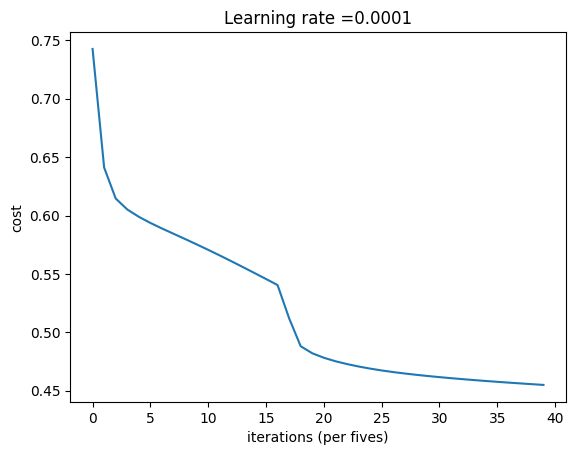

Parameters have been trained!


In [60]:
trained_parameters  = model(new_train, new_y_train, new_test, new_y_test, num_epochs=200)

In [61]:
print(trained_parameters)

{'W1': <tf.Variable 'Variable:0' shape=(25, 12288) dtype=float32, numpy=
array([[ 0.00159527, -0.00737913,  0.00893296, ..., -0.01227794,
         0.01642206,  0.00506491],
       [ 0.02264025,  0.0067227 ,  0.00795862, ...,  0.00284724,
         0.01910819,  0.00122853],
       [-0.00173585, -0.00872453, -0.01410444, ..., -0.00733837,
         0.0205085 , -0.02683027],
       ...,
       [-0.00126929,  0.01729332,  0.02082342, ...,  0.01709594,
         0.00429358, -0.00733263],
       [ 0.00268262,  0.004105  ,  0.00936713, ...,  0.01222287,
        -0.02717604,  0.01498359],
       [-0.00145541,  0.02459595,  0.00339064, ..., -0.02478788,
         0.02716016, -0.00306428]], dtype=float32)>, 'b1': <tf.Variable 'Variable:0' shape=(25, 1) dtype=float32, numpy=
array([[ 0.03964256],
       [-0.15545043],
       [ 0.19885883],
       [-0.24874453],
       [-0.28676757],
       [-0.12604603],
       [-0.01213098],
       [ 0.14784063],
       [-0.00413172],
       [-0.4408977 ],
       [ 

In [62]:
def create_model(parameters):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(25, activation='relu', input_shape=(12288,),
                              kernel_initializer=tf.constant_initializer(parameters['W1'].numpy()),
                              bias_initializer=tf.constant_initializer(parameters['b1'].numpy())),
        tf.keras.layers.Dense(12, activation='relu',
                              kernel_initializer=tf.constant_initializer(parameters['W2'].numpy()),
                              bias_initializer=tf.constant_initializer(parameters['b2'].numpy())),
        tf.keras.layers.Dense(6, activation='softmax',
                              kernel_initializer=tf.constant_initializer(parameters['W3'].numpy()),
                              bias_initializer=tf.constant_initializer(parameters['b3'].numpy()))
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [70]:
# Load the model
trained_model = create_model(trained_parameters)
print(trained_model)

Congratulations u have successfully completed the model implementation using tensorflow . eager tensor